In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv('heart_attack_prediction_dataset.csv')

In [2]:
print(df.head())
print(df.info())


  Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  

In [3]:
# Selecting relevant data for my study
df_selected = df[['Smoking', 'Income', 'Alcohol Consumption', 'Heart Attack Risk']]

# Handling any missing values
df_selected = df_selected.fillna(df_selected.mean())

# Split the data
X = df_selected.drop(columns=['Heart Attack Risk'])
y = df_selected['Heart Attack Risk']

In [4]:

# Spliting the data for the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using a scale for the figures
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building and training the Neighbors
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [5]:
# creating the predictions
y_pred = knn.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix and Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5812892184826013
Confusion Matrix:
[[855 270]
 [464 164]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.76      0.70      1125
           1       0.38      0.26      0.31       628

    accuracy                           0.58      1753
   macro avg       0.51      0.51      0.50      1753
weighted avg       0.55      0.58      0.56      1753



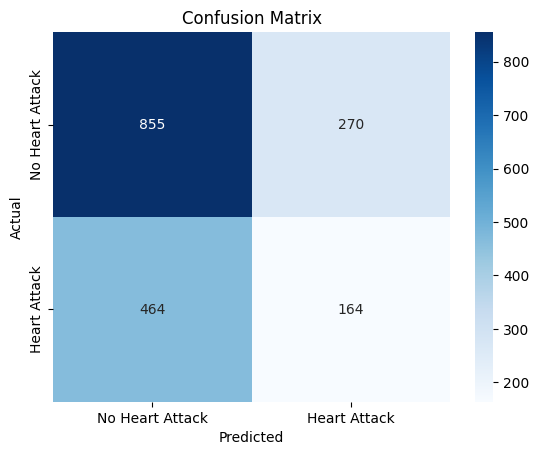

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Attack', 'Heart Attack'], yticklabels=['No Heart Attack', 'Heart Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [7]:
# Fine Tuning the current model

# Define the parameter grid
param_grid = {'n_neighbors': range(1, 21)}

# Perform GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# setting new parameters
print("Best Parameters:", grid_search.best_params_)

# Best model after tuning
best_knn = grid_search.best_estimator_

# Make predictions with the new fine tuning
y_pred_best = best_knn.predict(X_test)


Best Parameters: {'n_neighbors': 20}


/home/davey/my-jupyter-env/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Accuracy after tuning: 0.6212207644038791


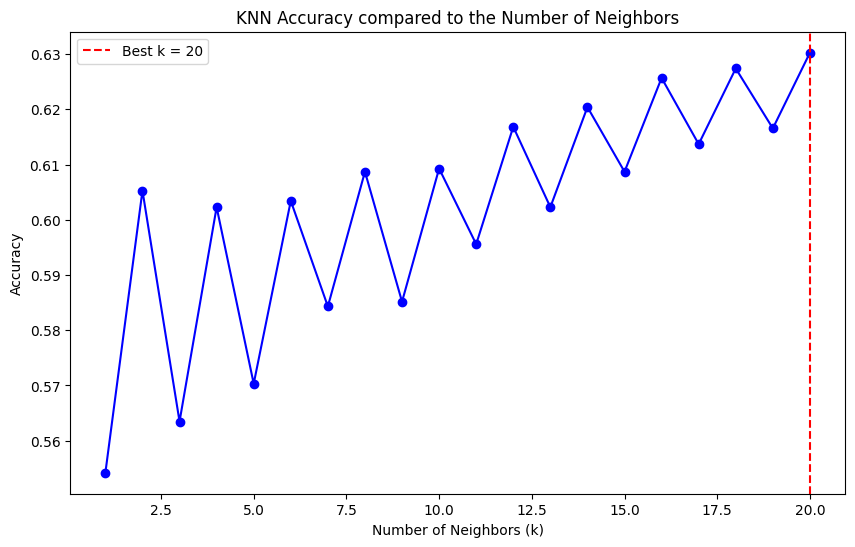

In [8]:
# Evaluate the model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy after tuning: {accuracy_best}")

# Plotting the accuracy for different values of n_neighbors
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), grid_search.cv_results_['mean_test_score'], marker='o', linestyle='-', color='b')

# Highlight the best value of n_neighbors
best_k = grid_search.best_params_['n_neighbors']
plt.axvline(best_k, color='r', linestyle='--', label=f'Best k = {best_k}')


plt.title("KNN Accuracy compared to the Number of Neighbors")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.legend()


plt.show()


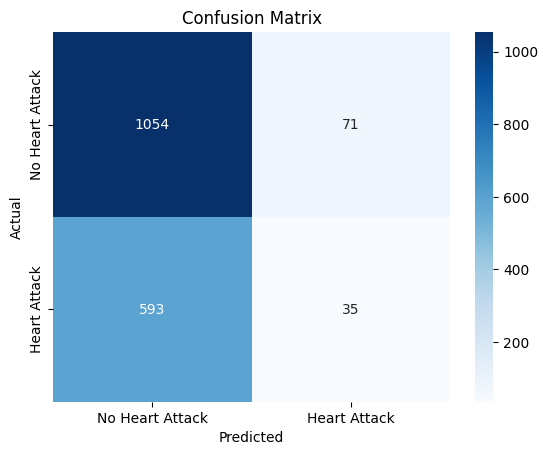

In [9]:
#replot after fine tuning the model
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Attack', 'Heart Attack'], yticklabels=['No Heart Attack', 'Heart Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()